<a href="https://colab.research.google.com/github/anvisgit/Decoder-Encoder/blob/main/Decoder_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [35]:
batchsize=128
learningrate=1e-3 #default for adam
epochs=5

In [36]:
transform = transforms.Compose([transforms.ToTensor()])

In [37]:
###
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [38]:
train=datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform )
test=datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

In [39]:
trainload=DataLoader(train, batch_size=batchsize, shuffle=True)   #True to reduce bias
testload=DataLoader(test, batch_size=batchsize, shuffle=False)   #False cause deterministic output

In [40]:
class mainmodel(nn.Module):    #creating a pytorch model
    def __init__(self):
        super(mainmodel, self).__init__()
        # Encoder==>compresses the image ==>downsampling
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(True),
        )
        # Decoder==>reconstructing image==>umsamples it
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, a):
        a = self.encoder(a)
        a = self.decoder(a)
        return a


In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    #cuda for much faster training
model = mainmodel().to(device)

In [42]:
criterion = nn.MSELoss()  # Reconstruction loss
optimizer = optim.Adam(model.parameters(), lr=learningrate)

In [43]:
for i in range(epochs):
  lossbase=0.00
  for img, img_label in trainload:
    img=img.to(device)
    outputs = model(img)
    loss = criterion(outputs, img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    lossbase += loss.item()
  avgloss=lossbase/len(trainload)
  print(f"Epoch [{i+1}/{epochs}], Avg Loss: {avgloss:.3f}")

Epoch [1/5], Avg Loss: 0.076
Epoch [2/5], Avg Loss: 0.012
Epoch [3/5], Avg Loss: 0.007
Epoch [4/5], Avg Loss: 0.005
Epoch [5/5], Avg Loss: 0.004


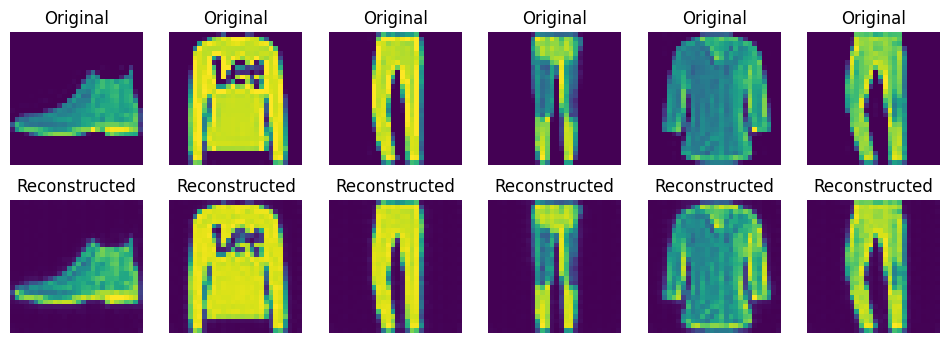

In [44]:

dataiter = iter(testload)
images, labels = next(dataiter)

images = images.to(device)
outputs = model(images)

# Detach and move to cpu for visualization
images = images.cpu().detach()
outputs = outputs.cpu().detach()

# Plot original and reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 4))
for i in range(6):
    # Original images
    axes[0, i].imshow(np.squeeze(images[i]))
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # Reconstructed images
    axes[1, i].imshow(np.squeeze(outputs[i]))
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')

plt.show()

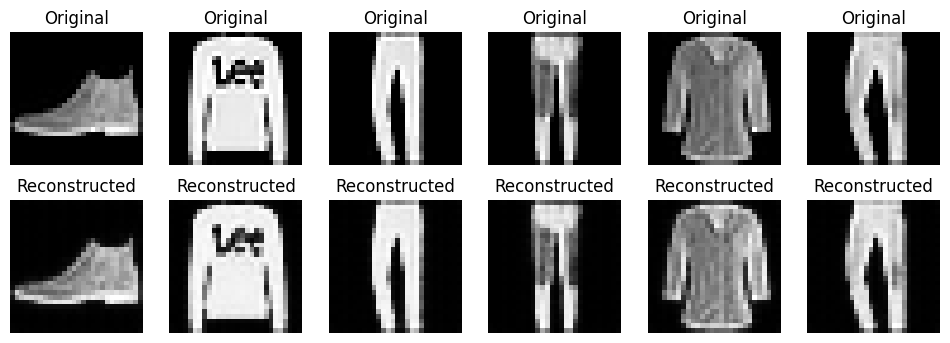

In [45]:


dataiter = iter(testload)
images, labels = next(dataiter)

images = images.to(device)
outputs = model(images)

# Detach and move to cpu for visualization
images = images.cpu().detach()
outputs = outputs.cpu().detach()

# Plot original and reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 4))
for i in range(6):
    # Original images
    axes[0, i].imshow(np.squeeze(images[i]),cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # Reconstructed images
    axes[1, i].imshow(np.squeeze(outputs[i]),cmap="gray")
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')

plt.show()